### Neural Networks and Computational Intelligence
**Assigment 1** \
Hugo Kolstee - s3515249 \
Yorick Juffer - s1993623

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Dataset
Generates a dataset where the vectors have a mean of 0 and a standard deviation of 1. Also generates the random labels of -1 and 1.

In [2]:
class Dataset:
    def __init__(self, p, n):
        self.p = p      # number of vectors
        self.n = n      # size of vectors
        self.data = self.generate_data()
        self.labels = self.generate_labels()

    def generate_data(self):
        data = np.random.normal(0, 1, size=(self.p, self.n))
        return data

    def generate_labels(self):
        labels = np.random.randint(2, size=self.p)
        labels[labels == 0] = -1
        return labels

#### Training

In [3]:
def train(data, iterations):
    weights = np.zeros(data.n, dtype = float)
    
    for i in range(iterations):
        misclassifications = 0

        for j in range(0, data.p):
            
            if(np.dot(weights, data.data[j]) * data.labels[j] <= 0):
                weights += (1/data.n) * data.data[j] * data.labels[j]
                misclassifications += 1


    return (data.p - misclassifications)/data.p * 100

#### Perceptron

In [4]:
def perceptron(feature):
    
    feature_vectors = [int(i * feature) for i in np.arange(0.75, 3.25, 0.25)]
    datasets = 50
    iterations = 100

    results = np.zeros(len(feature_vectors))

    for dataset in range(datasets):

        count = 0

        for feature_vector in feature_vectors:
            
            # generate
            data = Dataset(feature_vector, feature)

            # train
            accuracy = train(data, iterations)

            accuracy = (results[count] + accuracy) 
            results[count] = accuracy

            count += 1

    results = pd.DataFrame(results/datasets)
    results = results.assign(a=[i for i in np.arange(0.75, 3.25, 0.25)])

    return results

#### Run:

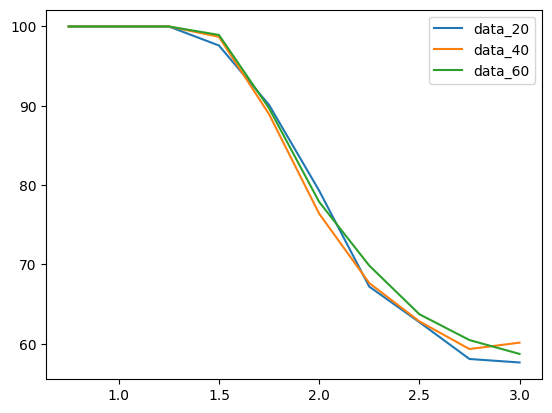

In [5]:
#run
data_20 = perceptron(20)
data_40 = perceptron(40)
data_60 = perceptron(60)

plt.plot(data_20["a"], data_20[0], label = "data_20")
plt.plot(data_40["a"], data_40[0], label = "data_40")
plt.plot(data_60["a"], data_60[0], label = "data_60")
plt.legend(loc="upper right")
plt.show()

